<a href="https://colab.research.google.com/github/AlexanderAvocone/Under-the-Hood/blob/main/UtH1_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Under the Hood 1: Logistische Regression**

##**Sigmoid Funktion:**
$h_w(x) = \frac{1}{1+e^{-w}}$ wobei $w = \hat{X}\vec{w} + b$

In [ ]:
def sigmoid(X, w, b):
  z = np.dot(X,w) + b
  return 1/(1+np.exp(-z))


##**Cost-Function:**
Für die Cost-Function $J(w)$  wird die Cross-Entropy-/Log-Loss-Function $\operatorname{Cost}\left(h_{w}(x), y\right)$ verwendet, da MSE (L2) keine "glatte" Kurve für $J(w)$ liefert.
$\operatorname{Cost}\left(h_{w}(x), y\right)=\left\{\begin{array}{ll}-\log \left(h_{w}(x)\right) & \text { if } \mathbf{y}=1 \\ -\log \left(1-h_{w}(x)\right) & \text { if } \mathbf{y}=0\end{array}\right. $


Hierraus folgt die Cost-Function:

$J(w)=-\frac{1}{m} \sum_{i=1}^{m} [y_i \log \left(h_{w}(x_i)\right)+(1-y_i) \log \left(1-h_{w}(x_i)\right)]$

In [ ]:
def cost_function(X, w, b, y):
  h0 = sigmoid(X,w,b)
  y1 = y*np.log(h0)
  y0 = (1-y)*np.log(1-h0)
  cost = -(y1+y0).mean()
  return cost

##**Gradient descent**
Minimum der Cost-Function zur Bestimmung von $w_{new}$ und $b_{new}$ nach jeder Iteration.

$\nabla_{w}J(w) = \frac{1}{m} \sum_{i=1}^{m}\left(h_{w}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}$
woraus folgt:

$w_{new} = w_i - \alpha \: \partial_{w} J(w)\:\:\:$   und $\: \:\: b_{new} = b_i - \alpha \: \partial_{b} J(w)$

mit $\left[ \begin{array}{rr}
\frac{\partial}{\partial w}  \\ 
\frac{\partial}{\partial b} \\
\end{array}\right] J =\frac{1}{m}\left [\begin{array}{rr}
\sum_{i=1}^{m} x_i^T(h_w(x_i)-y_i) \\ 
\sum_{i=1}^{m}\:\:\:\:\:\:(h_w(x_i)-y_i) \\
\end{array}\right] $ und $\alpha$ als learning rate.

In [ ]:
def gradient(X, w, b, y, alpha):
 
  h0 = sigmoid(X,w,b)
  m = len(y)

  delta_wJ = np.dot(X.T,h0-y)/m
  delta_bJ = (h0-y).mean()
  w = w - alpha*delta_wJ
  b = b - alpha*delta_bJ
  return w,b

#function to find minimum
def train(X, w, b, y, alpha, iter):
  cost_all = []
  w1_all = []
  w2_all = []
  for i in range(iter):
    w,b = gradient(X,w,b,y,alpha)
    cost = cost_function(X,w,b,y)
    cost_all.append(cost)
    w1_all.append(w[0,0])
    w2_all.append(w[1,0])
  return w,b,cost_all, w1_all, w2_all




##**Testen des Modells**

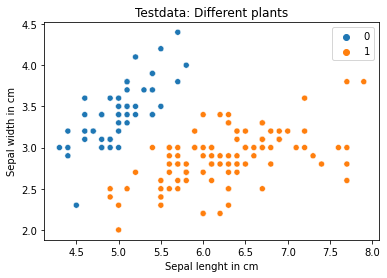

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

#Daten
#print(iris.feature_names)
#print(iris.target_names)
X = iris.data[:, :2]
Y = (iris.target != 0) * 1
sns.scatterplot(x=X[:,0], y=X[:,1], hue = Y)
plt.title("Testdata: Different plants")
plt.xlabel("Sepal lenght in cm")
plt.ylabel("Sepal width in cm")


#Startvalues for w and b
w = np.ones(shape= (X.shape[1],1))
b = 0

#y.shape = (150,) will be troublesome later on (h0-y) in the gradient function
Y.shape = (150,1)


In [ ]:
#Data training

#learning rate for the gradient descent
lr = .001
iterations = 50000

W_final, b_final,cost, w1, w2= train(X,w,b,Y,lr,iterations)


##**Visualsierung von cost und $w$**

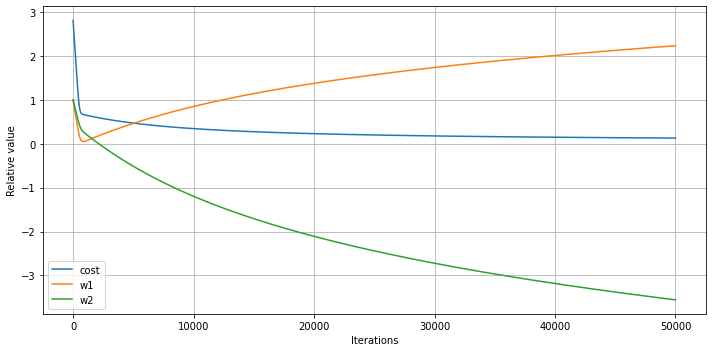

In [ ]:
x_iter = np.linspace(0,iterations,iterations)


plt.figure(figsize=(10,5), tight_layout = True)
plt.plot(x_iter, cost, label = "cost")
plt.plot(x_iter, w1, label = "w1")
plt.plot(x_iter, w2, label = "w2")
plt.xlabel("Iterations")
plt.ylabel("Relative value")
plt.legend()
plt.grid()


##**Vergleich mit Sklearn**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression()
Y.shape = (150,)
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101, stratify = Y)
logreg.fit(X_train, Y_train)

#Vergleich
print("DIY-logistic regression:")
print(W_final.shape)
print("Final w1:",W_final[0,0], "   Final w2:",W_final[1,0], "  Final b:", b_final)

coeff = logreg.coef_
print("\nSklearn:")
print(coeff.shape)
print("Final w1:",coeff[0,0], "   Final w2:",coeff[0,1])


DIY-logistic regression:
(2, 1)
Final w1: 2.230069550754554    Final w2: -3.553930434196409   Final b: -0.7573388588429768

Sklearn:
(1, 2)
Final w1: 2.937708819892263    Final w2: -2.749779540643096


In [ ]:
from sklearn.metrics import classification_report
h = sigmoid(X,W_final,b_final)
h = (h >=0.5) *1
print("DIY-predition:", 1-np.sum(np.abs(h-Y))/len(Y))
print("Sklearn-prediction:",logreg.score(x_test, y_test))

#print(classification_report(y_test, logreg.predict(x_test)))
print("Macht Sinn, da die Datensets doch klar getrennt voneinander sind.")

DIY-predition: 0.9933333333333333
Sklearn-prediction: 1.0
Macht Sinn, da die Datensets doch klar getrennt voneinander sind.
